In [1]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [2]:
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
import h5py
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import itertools
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
test_path = "D:/Project/test"
train_path = "D:/Project/train"
valid_path = "D:/drive/valid"

In [4]:
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, target_size=(224,224), batch_size=3, shuffle=False)
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=12)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=3)

Found 13689 images belonging to 2 classes.
Found 47496 images belonging to 2 classes.
Found 9666 images belonging to 2 classes.


In [10]:
#mobile = tf.keras.applications.mobilenet_v3.decode_predictions(preds, top = 5)


#mobile.summary()

In [5]:
mobile = tf.keras.applications.MobileNetV3Large(input_shape=None )


mobile.summary()

x = mobile.layers[-2].output
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling[0][0]']              
                                16)                                                

                                                                                                  
 expanded_conv_2/depthwise (Dep  (None, None, None,   648        ['re_lu_4[0][0]']                
 thwiseConv2D)                  72)                                                               
                                                                                                  
 expanded_conv_2/depthwise/Batc  (None, None, None,   288        ['expanded_conv_2/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_5 (ReLU)                 (None, None, None,   0           ['expanded_conv_2/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_

                                                                                                  
 expanded_conv_4/depthwise/Batc  (None, None, None,   480        ['expanded_conv_4/depthwise[0][0]
 hNorm (BatchNormalization)     120)                             ']                               
                                                                                                  
 re_lu_10 (ReLU)                (None, None, None,   0           ['expanded_conv_4/depthwise/Batch
                                120)                             Norm[0][0]']                     
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 1, 1, 120)   0           ['re_lu_10[0][0]']               
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
          

                                                                                                  
 expanded_conv_5/project (Conv2  (None, None, None,   4800       ['expanded_conv_5/squeeze_excite/
 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
          

 tf.__operators__.add_7 (TFOpLa  (None, None, None,   0          ['expanded_conv_7/depthwise/Batch
 mbda)                          200)                             Norm[0][0]']                     
                                                                                                  
 re_lu_18 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_7[0][0]'] 
                                200)                                                              
                                                                                                  
 tf.math.multiply_7 (TFOpLambda  (None, None, None,   0          ['re_lu_18[0][0]']               
 )                              200)                                                              
                                                                                                  
 multiply_4 (Multiply)          (None, None, None,   0           ['expanded_conv_7/depthwise/Batch
          

                                                                                                  
 tf.math.multiply_10 (TFOpLambd  (None, None, None,   0          ['re_lu_21[0][0]']               
 a)                             184)                                                              
                                                                                                  
 multiply_7 (Multiply)          (None, None, None,   0           ['expanded_conv_9/expand/BatchNor
                                184)                             m[0][0]',                        
                                                                  'tf.math.multiply_10[0][0]']    
                                                                                                  
 expanded_conv_9/depthwise (Dep  (None, None, None,   1656       ['multiply_7[0][0]']             
 thwiseConv2D)                  184)                                                              
          

 e/Relu (ReLU)                                                   /Conv[0][0]']                    
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 480)   58080       ['expanded_conv_10/squeeze_excite
 e/Conv_1 (Conv2D)                                               /Relu[0][0]']                    
                                                                                                  
 tf.__operators__.add_14 (TFOpL  (None, 1, 1, 480)   0           ['expanded_conv_10/squeeze_excite
 ambda)                                                          /Conv_1[0][0]']                  
                                                                                                  
 re_lu_25 (ReLU)                (None, 1, 1, 480)    0           ['tf.__operators__.add_14[0][0]']
                                                                                                  
 tf.math.m

                                                                                                  
 expanded_conv_11/project (Conv  (None, None, None,   75264      ['expanded_conv_11/squeeze_excite
 2D)                            112)                             /Mul[0][0]']                     
                                                                                                  
 expanded_conv_11/project/Batch  (None, None, None,   448        ['expanded_conv_11/project[0][0]'
 Norm (BatchNormalization)      112)                             ]                                
                                                                                                  
 expanded_conv_11/Add (Add)     (None, None, None,   0           ['expanded_conv_10/project/BatchN
                                112)                             orm[0][0]',                      
                                                                  'expanded_conv_11/project/BatchN
          

 expanded_conv_13/expand (Conv2  (None, None, None,   153600     ['expanded_conv_12/project/BatchN
 D)                             960)                             orm[0][0]']                      
                                                                                                  
 expanded_conv_13/expand/BatchN  (None, None, None,   3840       ['expanded_conv_13/expand[0][0]']
 orm (BatchNormalization)       960)                                                              
                                                                                                  
 tf.__operators__.add_21 (TFOpL  (None, None, None,   0          ['expanded_conv_13/expand/BatchNo
 ambda)                         960)                             rm[0][0]']                       
                                                                                                  
 re_lu_32 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_21[0][0]']
          

                                960)                                                              
                                                                                                  
 tf.math.multiply_24 (TFOpLambd  (None, None, None,   0          ['re_lu_35[0][0]']               
 a)                             960)                                                              
                                                                                                  
 multiply_17 (Multiply)         (None, None, None,   0           ['expanded_conv_14/expand/BatchNo
                                960)                             rm[0][0]',                       
                                                                  'tf.math.multiply_24[0][0]']    
                                                                                                  
 expanded_conv_14/depthwise (De  (None, None, None,   24000      ['multiply_17[0][0]']            
 pthwiseCo

 Conv_2 (Conv2D)                (None, 1, 1, 1280)   1230080     ['global_average_pooling2d[0][0]'
                                                                 ]                                
                                                                                                  
 tf.__operators__.add_28 (TFOpL  (None, 1, 1, 1280)  0           ['Conv_2[0][0]']                 
 ambda)                                                                                           
                                                                                                  
 re_lu_39 (ReLU)                (None, 1, 1, 1280)   0           ['tf.__operators__.add_28[0][0]']
                                                                                                  
 tf.math.multiply_28 (TFOpLambd  (None, 1, 1, 1280)  0           ['re_lu_39[0][0]']               
 a)                                                                                               
          

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling[0][0]']              
                                16)                                                           

 thwiseConv2D)                  72)                                                               
                                                                                                  
 expanded_conv_2/depthwise/Batc  (None, None, None,   288        ['expanded_conv_2/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_5 (ReLU)                 (None, None, None,   0           ['expanded_conv_2/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_2/project (Conv2  (None, None, None,   1728       ['re_lu_5[0][0]']                
 D)                             24)                                                               
          

 hNorm (BatchNormalization)     120)                             ']                               
                                                                                                  
 re_lu_10 (ReLU)                (None, None, None,   0           ['expanded_conv_4/depthwise/Batch
                                120)                             Norm[0][0]']                     
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 1, 1, 120)   0           ['re_lu_10[0][0]']               
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 1, 1, 32)    3872        ['expanded_conv_4/squeeze_excite/
 /Conv (Co

 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, None, None,   9600       ['expanded_conv_5/Add[0][0]']    
 )        

                                                                                                  
 re_lu_18 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_7[0][0]'] 
                                200)                                                              
                                                                                                  
 tf.math.multiply_7 (TFOpLambda  (None, None, None,   0          ['re_lu_18[0][0]']               
 )                              200)                                                              
                                                                                                  
 multiply_4 (Multiply)          (None, None, None,   0           ['expanded_conv_7/depthwise/Batch
                                200)                             Norm[0][0]',                     
                                                                  'tf.math.multiply_7[0][0]']     
          

 a)                             184)                                                              
                                                                                                  
 multiply_7 (Multiply)          (None, None, None,   0           ['expanded_conv_9/expand/BatchNor
                                184)                             m[0][0]',                        
                                                                  'tf.math.multiply_10[0][0]']    
                                                                                                  
 expanded_conv_9/depthwise (Dep  (None, None, None,   1656       ['multiply_7[0][0]']             
 thwiseConv2D)                  184)                                                              
                                                                                                  
 expanded_conv_9/depthwise/Batc  (None, None, None,   736        ['expanded_conv_9/depthwise[0][0]
 hNorm (Ba

 expanded_conv_10/squeeze_excit  (None, 1, 1, 480)   58080       ['expanded_conv_10/squeeze_excite
 e/Conv_1 (Conv2D)                                               /Relu[0][0]']                    
                                                                                                  
 tf.__operators__.add_14 (TFOpL  (None, 1, 1, 480)   0           ['expanded_conv_10/squeeze_excite
 ambda)                                                          /Conv_1[0][0]']                  
                                                                                                  
 re_lu_25 (ReLU)                (None, 1, 1, 480)    0           ['tf.__operators__.add_14[0][0]']
                                                                                                  
 tf.math.multiply_14 (TFOpLambd  (None, 1, 1, 480)   0           ['re_lu_25[0][0]']               
 a)                                                                                               
          

 2D)                            112)                             /Mul[0][0]']                     
                                                                                                  
 expanded_conv_11/project/Batch  (None, None, None,   448        ['expanded_conv_11/project[0][0]'
 Norm (BatchNormalization)      112)                             ]                                
                                                                                                  
 expanded_conv_11/Add (Add)     (None, None, None,   0           ['expanded_conv_10/project/BatchN
                                112)                             orm[0][0]',                      
                                                                  'expanded_conv_11/project/BatchN
                                                                 orm[0][0]']                      
                                                                                                  
 expanded_

                                                                                                  
 expanded_conv_13/expand/BatchN  (None, None, None,   3840       ['expanded_conv_13/expand[0][0]']
 orm (BatchNormalization)       960)                                                              
                                                                                                  
 tf.__operators__.add_21 (TFOpL  (None, None, None,   0          ['expanded_conv_13/expand/BatchNo
 ambda)                         960)                             rm[0][0]']                       
                                                                                                  
 re_lu_32 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_21[0][0]']
                                960)                                                              
                                                                                                  
 tf.math.m

 tf.math.multiply_24 (TFOpLambd  (None, None, None,   0          ['re_lu_35[0][0]']               
 a)                             960)                                                              
                                                                                                  
 multiply_17 (Multiply)         (None, None, None,   0           ['expanded_conv_14/expand/BatchNo
                                960)                             rm[0][0]',                       
                                                                  'tf.math.multiply_24[0][0]']    
                                                                                                  
 expanded_conv_14/depthwise (De  (None, None, None,   24000      ['multiply_17[0][0]']            
 pthwiseConv2D)                 960)                                                              
                                                                                                  
 expanded_

                                                                                                  
 tf.__operators__.add_28 (TFOpL  (None, 1, 1, 1280)  0           ['Conv_2[0][0]']                 
 ambda)                                                                                           
                                                                                                  
 re_lu_39 (ReLU)                (None, 1, 1, 1280)   0           ['tf.__operators__.add_28[0][0]']
                                                                                                  
 tf.math.multiply_28 (TFOpLambd  (None, 1, 1, 1280)  0           ['re_lu_39[0][0]']               
 a)                                                                                               
                                                                                                  
 multiply_20 (Multiply)         (None, 1, 1, 1280)   0           ['Conv_2[0][0]',                 
          

In [7]:
#Freezing weights all the layers upto the 4th last layer
#This is done because we will retrain only the last three layers
for layer in model.layers[:-4]:
    layer.trainable = False

In [8]:
model.compile(Adam(learning_rate=.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
checkpoint=tf.keras.callbacks.ModelCheckpoint("D:/Project/project_v3_large.h5",
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)

In [10]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.0001)

In [ ]:
model.fit_generator(train_batches, steps_per_epoch = 27, validation_data=valid_batches, validation_steps=27, epochs=3, verbose=1, callbacks=[checkpoint,reduce_lr])

C:\Users\mamoo\AppData\Local\Temp\ipykernel_5528\1102617402.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_batches, steps_per_epoch = 27, validation_data=valid_batches, validation_steps=27, epochs=3, verbose=1, callbacks=[checkpoint,reduce_lr])


Epoch 1/3


In [17]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
test_batches.class_indices

{'fire': 0, 'nonfire': 1}

In [19]:
predictions = model.predict(test_batches, batch_size=10, verbose=1)

567/567 [==============================] - 119s 206ms/step


In [20]:
predictions.shape

(13593, 2)

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
test_labels.shape

(13593,)

In [23]:
cm = confusion_matrix(test_labels, predictions.argmax(axis =1))

In [24]:
test_batches.class_indices

{'fire': 0, 'nonfire': 1}

Confusion matrix, without normalization
[[2409 1091]
 [ 778 9315]]


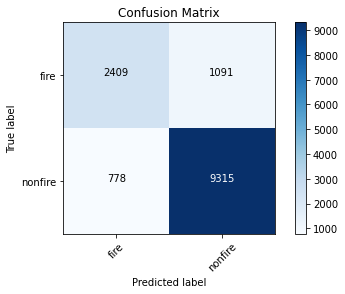

In [25]:
cm_plot_labels = ['fire','nonfire']
plot_confusion_matrix(cm ,cm_plot_labels, title='Confusion Matrix')